# Data Analytics Certificate: Final Capstone Project
## Author: Rachel Forbes

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
bank = pd.read_csv("Bank.csv")

# Part A: Data Cleaning and Basic Data Exploration

## Basic Data Exploration

In [3]:
bank.shape # ensure rows (number of customers) and columns (number of variables) are correct

(4499, 17)

In [4]:
bank.head() # look at data

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Branch Address 1,Branch Address 2,Branch Address 3
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,31,7,173,218 S. Westport Court,1,6,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.


In [5]:
bank.info() # ensure no missing values, look at data types
# Issue: CCAvg should be an float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  4499 non-null   int64 
 1   Experience           4499 non-null   int64 
 2   Income               4499 non-null   int64 
 3   Branch Address       4499 non-null   object
 4   Family               4499 non-null   int64 
 5   CCAvg                4499 non-null   object
 6   Mortgage             4499 non-null   int64 
 7   Personal Loan        4499 non-null   int64 
 8   Brokerage Account    4499 non-null   int64 
 9   GIC Account          4499 non-null   int64 
 10  Online               4499 non-null   int64 
 11  CreditCard           4499 non-null   int64 
 12  Advisor Name         4499 non-null   object
 13  Advisor Designation  4499 non-null   object
 14  Branch Address 1     4499 non-null   object
 15  Branch Address 2     4499 non-null   object
 16  Branch

In [6]:
bank.describe() 
# Issue: experience has an invalid minimum value (-3.00)

,Age,Experience,Income,Family,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.028895,74.303401,2.398088,56.085575,0.106690,0.108691,0.064903,0.592132,0.296733
std,11.454680,11.461481,46.310561,1.147040,101.788264,0.308754,0.311286,0.246383,0.491493,0.456868
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,99.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

### Resolve Issue: Convert CCAvg to float and replace invalid object

In [7]:
# Check to see whether all values in 'CCAvg' column can be reassigned to float, print value if not
for obj in bank['CCAvg']:
    try:
        casted = float(obj)
    except:
        print('Invalid:', obj)

Invalid: 2,00


In [8]:
# Replace invalid object '2,00' with value 2.00
bank['CCAvg'] = bank['CCAvg'].replace(['2,00'], '2.00')

In [9]:
# Make each object in series a float
bank['CCAvg'] = bank['CCAvg'].astype(float)

In [10]:
# Check to ensure conversion worked
bank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4499 non-null   int64  
 1   Experience           4499 non-null   int64  
 2   Income               4499 non-null   int64  
 3   Branch Address       4499 non-null   object 
 4   Family               4499 non-null   int64  
 5   CCAvg                4499 non-null   float64
 6   Mortgage             4499 non-null   int64  
 7   Personal Loan        4499 non-null   int64  
 8   Brokerage Account    4499 non-null   int64  
 9   GIC Account          4499 non-null   int64  
 10  Online               4499 non-null   int64  
 11  CreditCard           4499 non-null   int64  
 12  Advisor Name         4499 non-null   object 
 13  Advisor Designation  4499 non-null   object 
 14  Branch Address 1     4499 non-null   object 
 15  Branch Address 2     4499 non-null   o

### Resolve issue: Remove invalid Experience value (< 0)

In [11]:
# Replace invalid responses with None
for val in bank['Experience']:
    if val < 0:
        bank['Experience'].replace(val, None, inplace = True) 

In [12]:
# Check to ensure replacement worked
print(bank['Experience'].describe()) 

count    4499.000000
mean       20.237831
std        11.316179
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


### Resolve issue: Create two mortgage variables: presence/absense and mortgage amount

In [13]:
bank["MortgageAmount"] = bank['Mortgage'].replace(0, np.nan)

In [14]:
bank["MortgageAmount"].describe()

count    1370.000000
mean      184.181752
std       102.134723
min        75.000000
25%       109.000000
50%       152.500000
75%       229.000000
max       617.000000
Name: MortgageAmount, dtype: float64

In [15]:
for val in bank['Mortgage']:
    if val > 0:
        bank["MortgagePresent"] = bank["Mortgage"].replace(val, 1, inplace = True) 
    else:
        bank["MortgagePresent"] = bank["Mortgage"]

In [16]:
bank["MortgagePresent"].value_counts()

0    3129
1    1370
Name: MortgagePresent, dtype: int64

### Resolve issue: Transform skewed data

In [17]:
# Create a subset of continuous variables
contSub = bank[['Age', 'Experience', 'Income','CCAvg', 'MortgageAmount']]

In [18]:
# Examine skew and kurtosis
skew = contSub.skew()
kurt = contSub.kurt()
print(skew)
# CCAvg and Mortgage are highly skewed, Income is moderately skewed
print(kurt)
# Mortgage has heavier tails than a normal distribution

Age              -0.015910
Experience       -0.003206
Income            0.820516
CCAvg             1.573988
MortgageAmount    1.541646
dtype: float64
Age              -1.153270
Experience       -1.134595
Income           -0.104670
CCAvg             2.548578
MortgageAmount    2.464204
dtype: float64


Age                   AxesSubplot(0.125,0.71587;0.227941x0.16413)
Experience         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Income             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
CCAvg                AxesSubplot(0.125,0.518913;0.227941x0.16413)
MortgageAmount    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
dtype: object

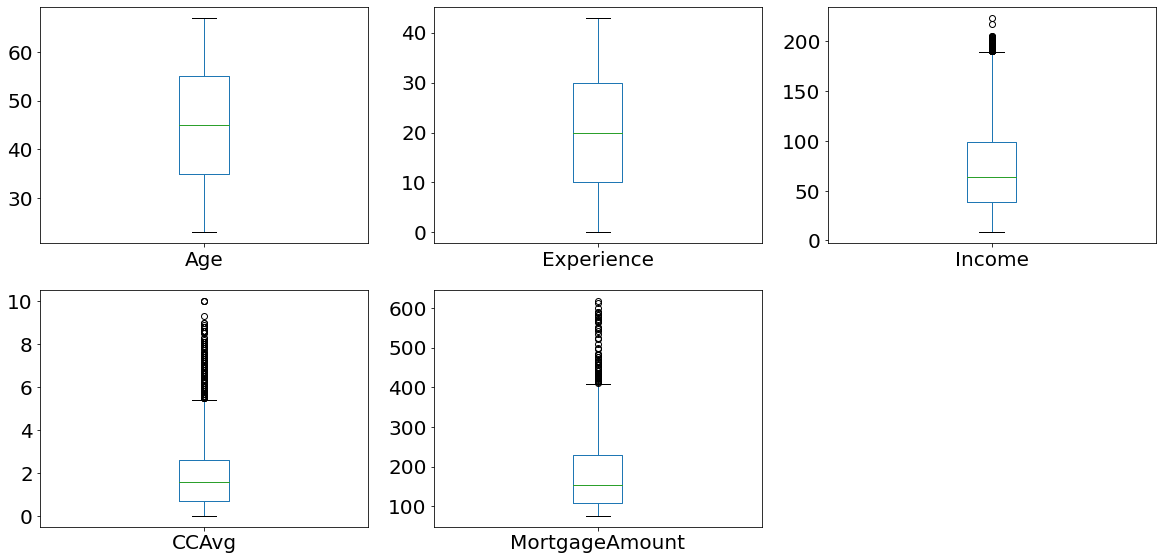

In [19]:
# income, CCAvg, and Mortgage have outliers
contSub.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,20), fontsize = 20)

No handles with labels found to put in legend.


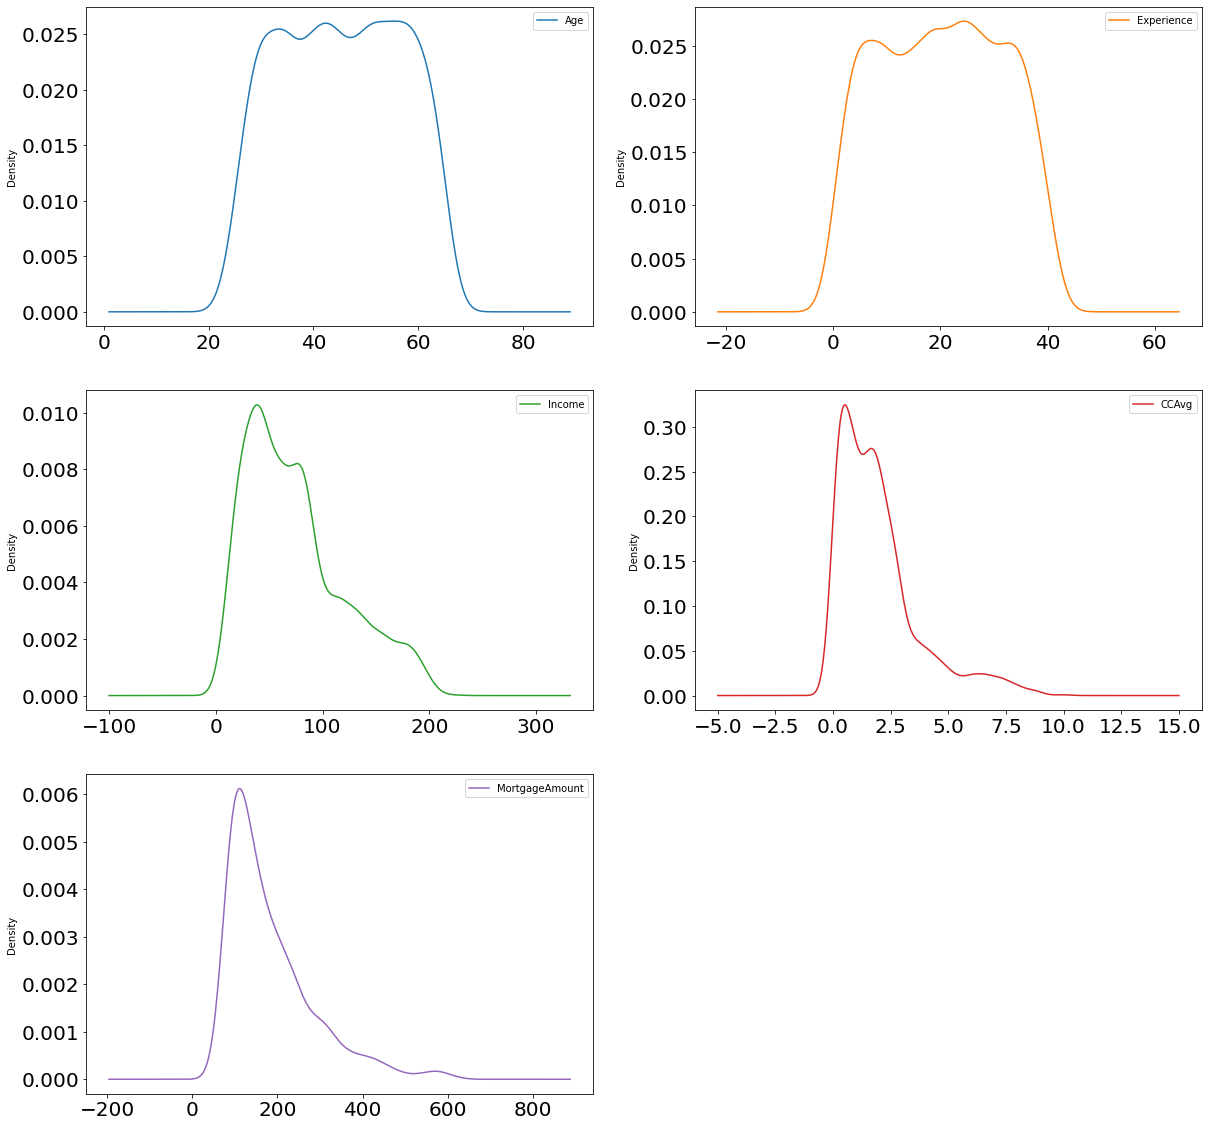

In [20]:
# income, CCAvg, and Mortgage are positively skewed
contSub.plot(kind = 'density', subplots = True, layout = (3,2), sharex = False, sharey = False, figsize=(20,20), fontsize = 20)
plt.legend()
plt.rc('legend', fontsize=20)

In [21]:
# SQRT transform for moderate positive skew
bank["income_sqrt"] = np.sqrt(bank["Income"])
print(bank["income_sqrt"].skew())

0.24753825394502563


In [22]:
# log transform for substantial positive skew
bank["CCAvg_log"] = np.log1p(bank["CCAvg"])
print(bank["CCAvg_log"].skew())

0.30352599454434515


In [23]:
# log transform for substantial positive skew
bank["mortgage_log"] = np.log1p(bank["MortgageAmount"])
print(bank["mortgage_log"].skew())

0.4927285865241491


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66f64b37b8>,
      dtype=object)

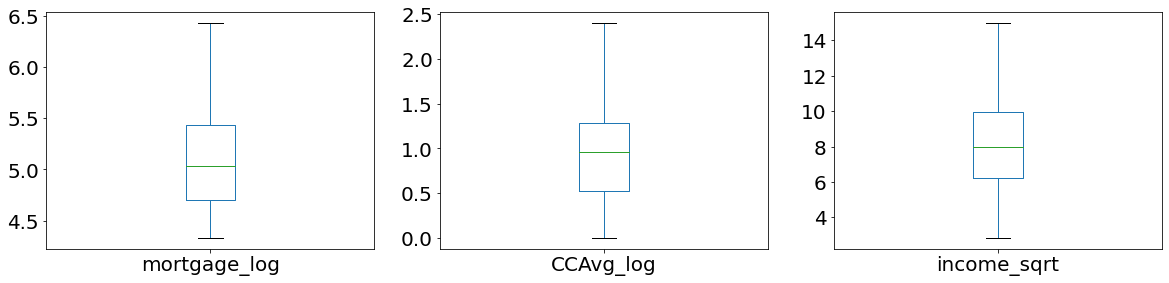

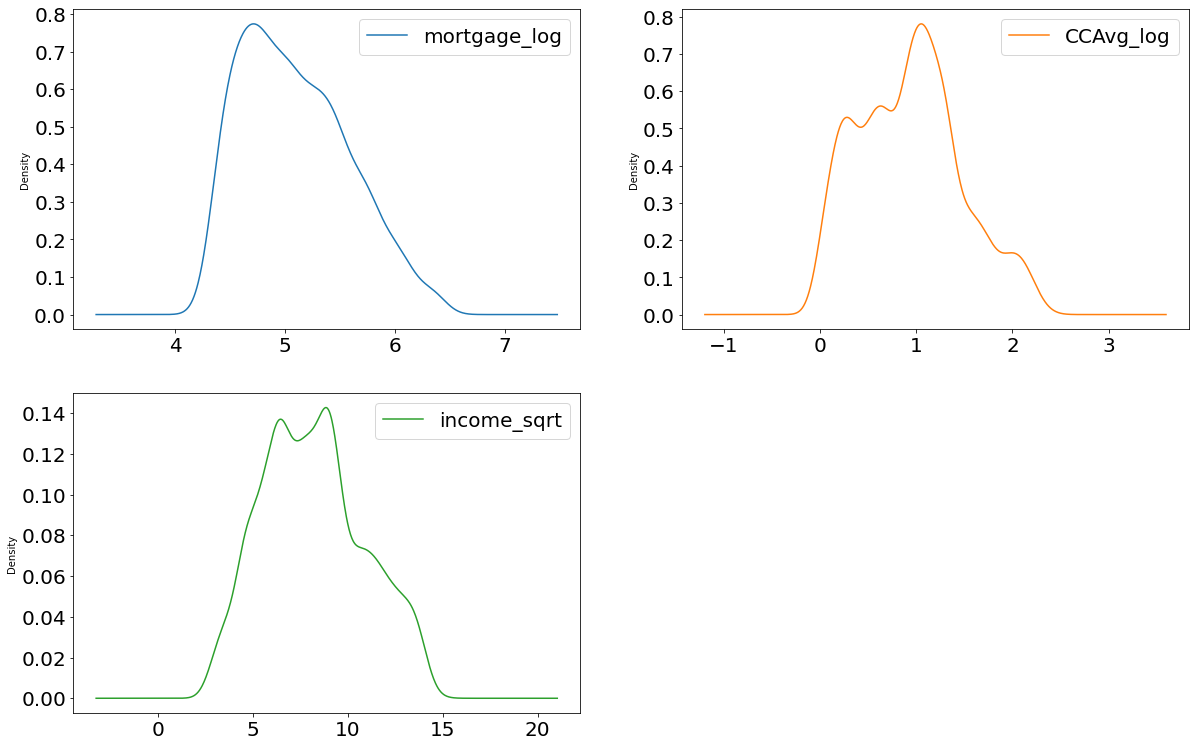

In [24]:
tranSub = bank[["mortgage_log", "CCAvg_log", "income_sqrt"]]
tranSub.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,20), fontsize = 20)
tranSub.plot(kind = 'density', subplots = True, layout = (3,2), sharex = False, sharey = False, figsize=(20,20), fontsize = 20)

# Part B: Exploratory Data Analysis

## Explore the target: Personal Loan

In [25]:
# Summarize the personal loan variable
bank["Personal Loan"].value_counts()

0    4019
1     480
Name: Personal Loan, dtype: int64

In [26]:
# Calculate the proportion of converters from last year's marketing campagin
bank["Personal Loan"].value_counts(normalize = True) * 100

0    89.330962
1    10.669038
Name: Personal Loan, dtype: float64

Text(0.5, 1.0, 'Coverted Customers')

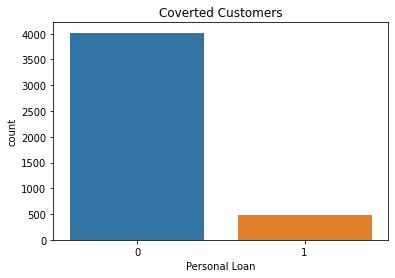

In [27]:
# Bar chart of Personal Loan variable
PL = sns.countplot(bank["Personal Loan"])
PL.set_title("Coverted Customers")

## Correlations

                        Age  Experience    Family  Personal Loan  \
Age                1.000000    0.973062 -0.048435      -0.006083   
Experience         0.973062    1.000000 -0.048659      -0.012036   
Family            -0.048435   -0.048659  1.000000       0.064607   
Personal Loan     -0.006083   -0.012036  0.064607       1.000000   
Brokerage Account -0.004376   -0.001660  0.020133       0.018109   
GIC Account        0.006669    0.004589  0.013183       0.318107   
Online             0.012411    0.010290  0.009264       0.009928   
CreditCard         0.010359    0.012707  0.015083       0.000896   
MortgagePresent   -0.008921   -0.011561  0.006999       0.034159   
income_sqrt       -0.052853   -0.047520 -0.132835       0.485887   
CCAvg_log         -0.048534   -0.045988 -0.075172       0.351852   
mortgage_log      -0.006589   -0.005561 -0.065283       0.337552   

                   Brokerage Account  GIC Account    Online  CreditCard  \
Age                        -0.004376    

[Text(0, 0, 'Age'),
 Text(0, 0, 'Experience'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Personal Loan'),
 Text(0, 0, 'Brokerage Account'),
 Text(0, 0, 'GIC Account'),
 Text(0, 0, 'Online'),
 Text(0, 0, 'CreditCard'),
 Text(0, 0, 'MortgagePresent'),
 Text(0, 0, 'income_sqrt'),
 Text(0, 0, 'CCAvg_log'),
 Text(0, 0, 'mortgage_log')]

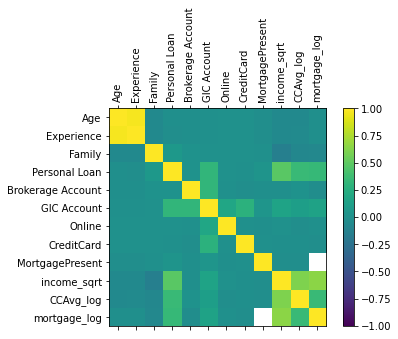

In [28]:
# Data subset removing non-transformed variables
bankNew = bank[["Age", "Experience", "Family", "Personal Loan", "Brokerage Account", "GIC Account", "Online",
                "CreditCard", "MortgagePresent", "income_sqrt", "CCAvg_log", "mortgage_log"]]
# Print correlation matrix
correlations = bankNew.corr()
print(correlations)

# Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax= ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Change tick labels
ticks = range(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(bankNew.columns, rotation=90)
ax.set_yticklabels(bankNew.columns)

# Highest correlations with our var of interest (Personal Loan):
# income_sqrt, CCAvg_log, mortgage_log, GIC Account

## Exploring variables of interest: income_sqrt, CCAvg_log, mortgage_log, GIC Account

In [29]:
# Subset data with vars of interest
bankExplore = bank[['Personal Loan','income_sqrt', 'CCAvg_log', 'mortgage_log', 'GIC Account']]

by_personal_loan= bankExplore.groupby('Personal Loan')
PLmeans = by_personal_loan.mean()
PLstd = by_personal_loan.std()

In [30]:
PLdescriptive = PLmeans.merge(PLstd, on = "Personal Loan", suffixes=("_mean","_std"))
PLdescriptive = (round(PLdescriptive,2)).to_csv()
print(PLdescriptive)

Personal Loan,income_sqrt_mean,CCAvg_log_mean,mortgage_log_mean,GIC Account_mean,income_sqrt_std,CCAvg_log_std,mortgage_log_std,GIC Account_std
0,7.75,0.87,5.03,0.04,2.43,0.5,0.45,0.19
1,11.95,1.48,5.53,0.29,1.35,0.51,0.54,0.46



### GIC Account

GIC Account       0    1
Personal Loan           
0              3867  152
1               340  140
GIC Account           0         1
Personal Loan                    
0              0.962180  0.037820
1              0.708333  0.291667


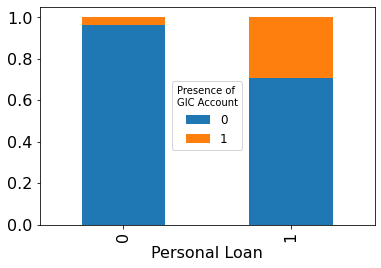

In [31]:
GIC_crosstab = pd.crosstab(bank["Personal Loan"], bank["GIC Account"], margins = False)
print(GIC_crosstab)

GIC_crosstab_norm= GIC_crosstab.div(GIC_crosstab.sum(axis=1), axis=0)
print(GIC_crosstab_norm)
GIC_crosstab_norm.plot(kind = 'bar', stacked = True, fontsize = 16)
plt.xlabel('Personal Loan', fontsize=16)
plt.legend(loc='center',prop={'size': 12}, title = "Presence of \nGIC Account")
# looks like those who have a GIC account are more likely to convert

### Income

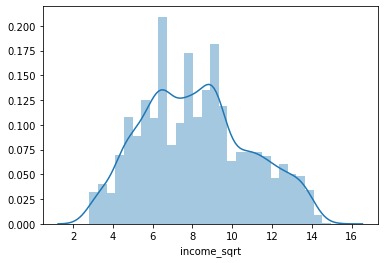

In [32]:
sns.distplot(bankExplore["income_sqrt"])

In [33]:
# Separate the variable income_sqrt, by the two values of the target
loan_income_T= bank[bank["Personal Loan"] == 1] ["income_sqrt"]
loan_income_F= bank[bank["Personal Loan"] == 0] ["income_sqrt"]

Text(0, 0.5, 'Frequency')

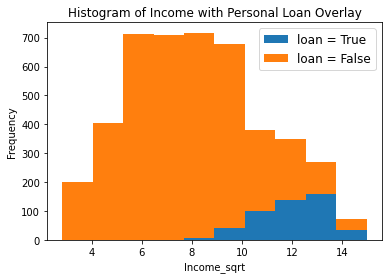

In [34]:
# Create a stacked histogram of the two variables
plt.hist([loan_income_T, loan_income_F], bins = 10, stacked = True)
plt.legend(['loan = True', 'loan = False'], prop={'size': 12})
plt.title('Histogram of Income with Personal Loan Overlay')
plt.xlabel('Income_sqrt')
plt.ylabel('Frequency')

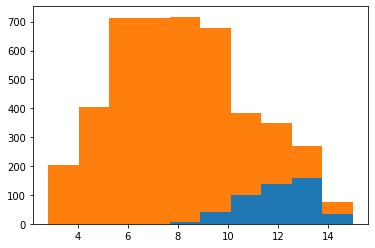

In [35]:
(n, bins, patches) = plt.hist([loan_income_T, loan_income_F], bins = 10, stacked = True)

Text(0, 0.5, 'Frequency')

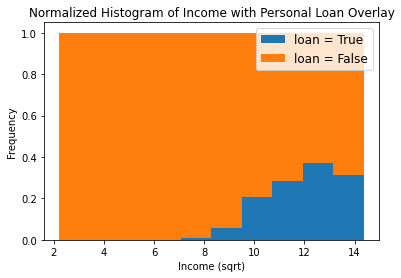

In [36]:
# Normalized
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins= np.column_stack((bins[0:10], bins[1:11]))
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] -ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] -ourbins[:, 0],
bottom = n_norm[:,0])

plt.legend(['loan = True', 'loan = False'], prop={'size': 12})
plt.title('Normalized Histogram of Income with Personal Loan Overlay')
plt.xlabel('Income (sqrt)')
plt.ylabel('Frequency')

### CCAvg

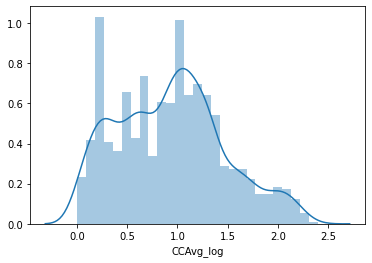

In [37]:
sns.distplot(bankExplore["CCAvg_log"])

In [38]:
# Separate the variable CCAvg_log, by the two values of the target
loan_CCAvg_T= bank[bank["Personal Loan"] == 1] ["CCAvg_log"]
loan_CCAvg_F= bank[bank["Personal Loan"] == 0] ["CCAvg_log"]

Text(0, 0.5, 'Frequency')

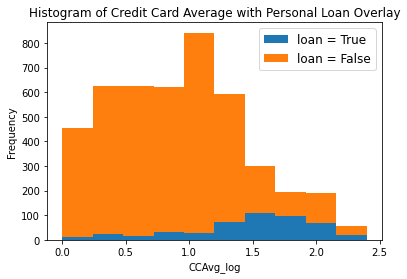

In [39]:
# Create a stacked histogram of the two variables
plt.hist([loan_CCAvg_T, loan_CCAvg_F], bins = 10, stacked = True)
plt.xlabel('CCAvg_log')
plt.legend(['loan = True', 'loan = False'], prop={'size': 12})
plt.title('Histogram of Credit Card Average with Personal Loan Overlay')
plt.xlabel('CCAvg_log')
plt.ylabel('Frequency')

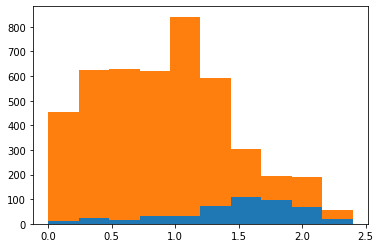

In [40]:
(n, bins, patches) = plt.hist([loan_CCAvg_T, loan_CCAvg_F], bins = 10, stacked = True)

Text(0, 0.5, 'Frequency')

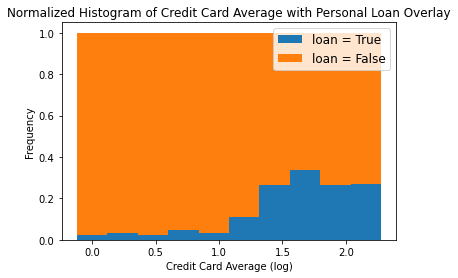

In [41]:
# Normalized
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins= np.column_stack((bins[0:10], bins[1:11]))
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] -ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] -ourbins[:, 0],
bottom = n_norm[:,0])

plt.legend(['loan = True', 'loan = False'], prop={'size': 12})
plt.title('Normalized Histogram of Credit Card Average with Personal Loan Overlay')
plt.xlabel('Credit Card Average (log)')
plt.ylabel('Frequency')

### Mortgage

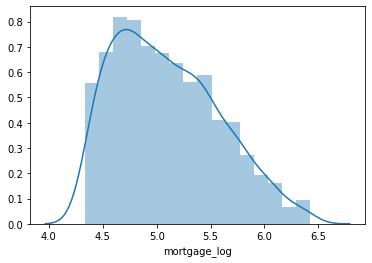

In [42]:
sns.distplot(bankExplore["mortgage_log"])

In [43]:
# Separate the variable income_sqrt, by the two values of the target
loan_mortgage_T= bank[bank["Personal Loan"] == 1] ["mortgage_log"]
loan_mortgage_F= bank[bank["Personal Loan"] == 0] ["mortgage_log"]

Text(0, 0.5, 'Frequency')

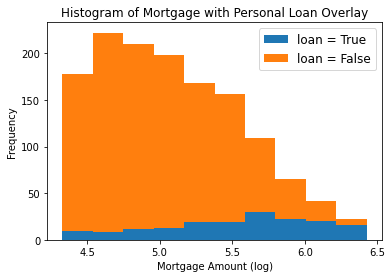

In [44]:
# Create a stacked histogram of the two variables
plt.hist([loan_mortgage_T, loan_mortgage_F], bins = 10, stacked = True)
plt.legend(['loan = True', 'loan = False'], prop={'size': 12})
plt.title('Histogram of Mortgage with Personal Loan Overlay')
plt.xlabel('Mortgage Amount (log)')
plt.ylabel('Frequency')

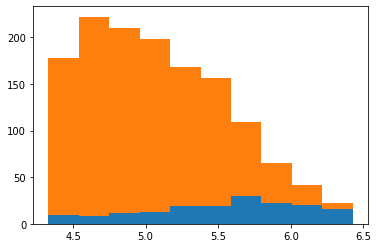

In [45]:
(n, bins, patches) = plt.hist([loan_mortgage_T, loan_mortgage_F], bins = 10, stacked = True)

Text(0, 0.5, 'Frequency')

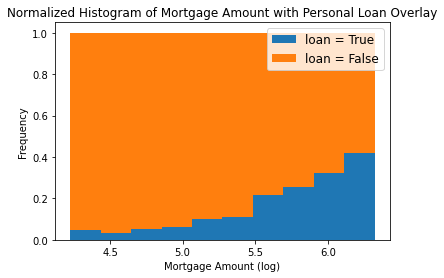

In [46]:
# Normalized
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins= np.column_stack((bins[0:10], bins[1:11]))
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] -ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] -ourbins[:, 0],
bottom = n_norm[:,0])

plt.legend(['loan = True', 'loan = False'], prop={'size': 12})
plt.title('Normalized Histogram of Mortgage Amount with Personal Loan Overlay')
plt.xlabel('Mortgage Amount (log)')
plt.ylabel('Frequency')

## Supplemental: Exploring other variables

### Family

1    1321
2    1165
4    1099
3     914
Name: Family, dtype: int64

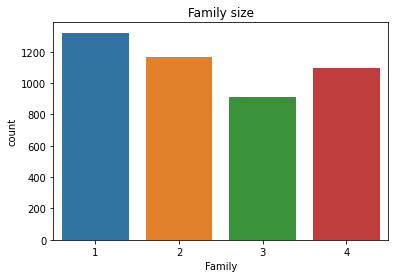

In [47]:
# Count plot
fam = sns.countplot(bank["Family"])
fam.set_title("Family size")

# Value counts
bank["Family"].value_counts()

Family            1     2    3    4
Personal Loan                      
0              1214  1059  781  965
1               107   106  133  134


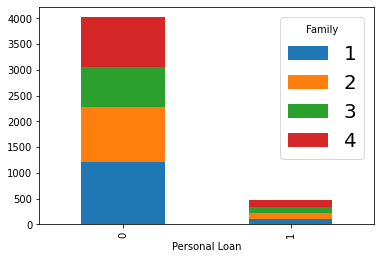

In [48]:
# Explore family by personal loan conversion
fam_crosstab = pd.crosstab(bank["Personal Loan"], bank["Family"], margins = False)
print(fam_crosstab)
fam_crosstab.plot(kind = 'bar', stacked = True)

Family                1         2         3         4
Personal Loan                                        
0              0.302065  0.263498  0.194327  0.240109
1              0.222917  0.220833  0.277083  0.279167


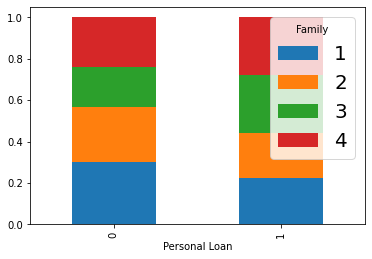

In [49]:
# Explore family by personal loan conversion normalized
fam_crosstab_norm= fam_crosstab.div(fam_crosstab.sum(axis=1), axis=0)
print(fam_crosstab_norm)
fam_crosstab_norm.plot(kind = 'bar', stacked = True)

### Brokerage Account

Brokerage Account     0    1
Personal Loan               
0                  3590  429
1                   420   60
Brokerage Account         0         1
Personal Loan                        
0                  0.893257  0.106743
1                  0.875000  0.125000


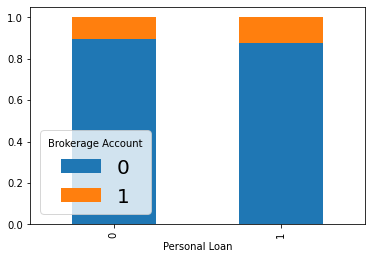

In [50]:
BA_crosstab = pd.crosstab(bank["Personal Loan"], bank["Brokerage Account"], margins = False)
print(BA_crosstab)

BA_crosstab_norm= BA_crosstab.div(BA_crosstab.sum(axis=1), axis=0)
print(BA_crosstab_norm)
BA_crosstab_norm.plot(kind = 'bar', stacked = True)

### Mortgage Presence

MortgagePresent     0     1
Personal Loan              
0                2817  1202
1                 312   168
MortgagePresent         0         1
Personal Loan                      
0                0.700921  0.299079
1                0.650000  0.350000


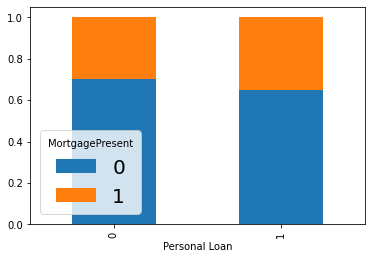

In [51]:
MP_crosstab = pd.crosstab(bank["Personal Loan"], bank["MortgagePresent"], margins = False)
print(MP_crosstab)

MP_crosstab_norm= MP_crosstab.div(MP_crosstab.sum(axis=1), axis=0)
print(MP_crosstab_norm)
MP_crosstab_norm.plot(kind = 'bar', stacked = True)

### Online

Online            0     1
Personal Loan            
0              1646  2373
1               189   291
Online                0         1
Personal Loan                    
0              0.409555  0.590445
1              0.393750  0.606250


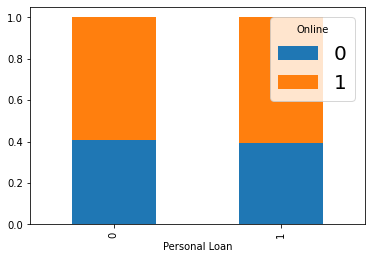

In [52]:
ON_crosstab = pd.crosstab(bank["Personal Loan"], bank["Online"], margins = False)
print(ON_crosstab)

ON_crosstab_norm = ON_crosstab.div(ON_crosstab.sum(axis=1), axis=0)
print(ON_crosstab_norm)
ON_crosstab_norm.plot(kind = 'bar', stacked = True)

### Credit Card

CreditCard        0     1
Personal Loan            
0              2827  1192
1               337   143
CreditCard            0         1
Personal Loan                    
0              0.703409  0.296591
1              0.702083  0.297917


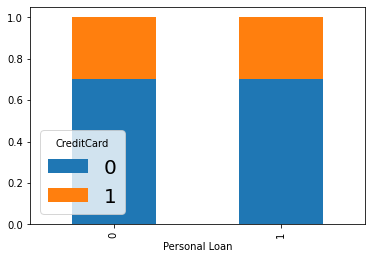

In [53]:
CC_crosstab = pd.crosstab(bank["Personal Loan"], bank["CreditCard"], margins = False)
print(CC_crosstab)

CC_crosstab_norm= CC_crosstab.div(CC_crosstab.sum(axis=1), axis=0)
print(CC_crosstab_norm)
CC_crosstab_norm.plot(kind = 'bar', stacked = True)

### Age

In [54]:
# Describe
bank[["Age"]].describe()

,Age
count,4499.000000
mean,45.268282
std,11.454680
min,23.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,67.000000


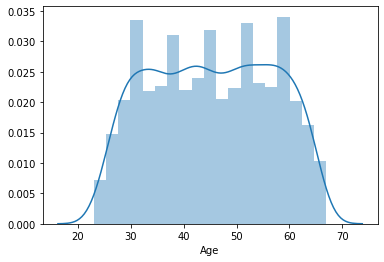

In [55]:
sns.distplot(bank["Age"])

In [56]:
# Separate the variable income_sqrt, by the two values of the target
loan_age_T= bank[bank["Personal Loan"] == 1] ["Age"]
loan_age_F= bank[bank["Personal Loan"] == 0] ["Age"]

Text(0, 0.5, 'Frequency')

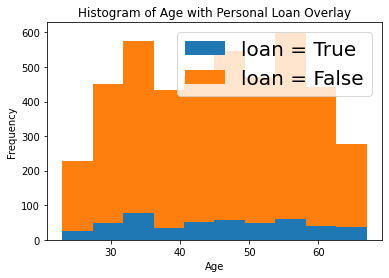

In [57]:
# Create a stacked histogram of the two variables
plt.hist([loan_age_T, loan_age_F], bins = 10, stacked = True)
plt.legend(['loan = True', 'loan = False'])
plt.title('Histogram of Age with Personal Loan Overlay')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Experience

In [58]:
# Describe
bank[["Experience"]].describe()

,Experience
count,4499.000000
mean,20.237831
std,11.316179
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,43.000000


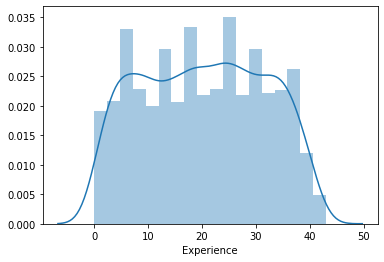

In [59]:
sns.distplot(bank["Experience"])

In [60]:
# Separate the variable income_sqrt, by the two values of the target
loan_experience_T= bank[bank["Personal Loan"] == 1] ["Experience"]
loan_experience_F= bank[bank["Personal Loan"] == 0] ["Experience"]

Text(0, 0.5, 'Frequency')

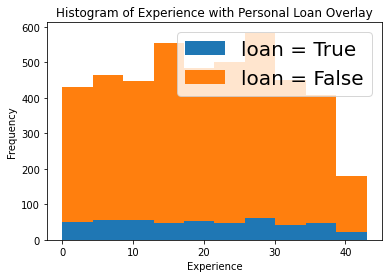

In [61]:
# Create a stacked histogram of the two variables
plt.hist([loan_experience_T, loan_experience_F], bins = 10, stacked = True)
plt.legend(['loan = True', 'loan = False'])
plt.title('Histogram of Experience with Personal Loan Overlay')
plt.xlabel('Experience')
plt.ylabel('Frequency')

# Part C: Business Analytics

### Who is or are the most successful financial advisor(s)?
### If the goal of the company is to convert customers on a personal loan, I can examine which advisor has converted the most customers

In [62]:
advisor_crosstab= pd.crosstab(bank["Personal Loan"], bank["Advisor Name"], margins=True)

In [63]:
print(advisor_crosstab)

Advisor Name   Aleida Suitt  Beatriz Rolf  Bernarda Guilliams  Berry Gartman  \
Personal Loan                                                                  
0                        83            82                  95             71   
1                        11            10                   9              6   
All                      94            92                 104             77   

Advisor Name   Brandon Sum  Caitlin Wimmer  Carolin Whitmire  Carylon Race  \
Personal Loan                                                                
0                       86              92                89            76   
1                       10               6                 5            12   
All                     96              98                94            88   

Advisor Name   Cecil Caves  Collene Dubon  ...  Thao Lovato  Twila Bare  \
Personal Loan                              ...                            
0                       88             77  ...           9

Advisor Name
Gita Pinelli          16
Prudence Masters      15
Kathaleen Horgan      15
Jacqueline Leveque    14
Corazon Eastin        13
Name: 1, dtype: int64
count    49.000000
mean      9.795918
std       2.629794
min       5.000000
25%       8.000000
50%      10.000000
75%      12.000000
max      16.000000
Name: 1, dtype: float64


(0.0, 20.0)

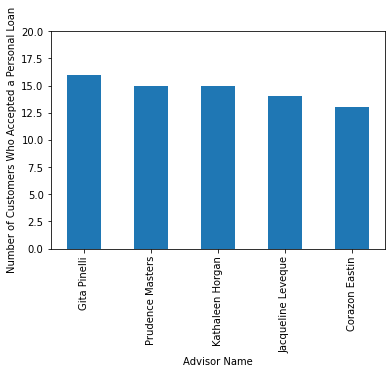

In [64]:
mostSuccessfulRaw = (advisor_crosstab.iloc[1]).sort_values(ascending = False)
mostSuccessfulRaw = mostSuccessfulRaw[1:] # remove "all" total row
print(mostSuccessfulRaw.head())
print(mostSuccessfulRaw.describe())
top5Raw = mostSuccessfulRaw.head() 
top5Raw.plot(kind = 'bar', stacked = True)
plt.ylabel("Number of Customers Who Accepted a Personal Loan")
plt.ylim((0,20))

In [65]:
bank["Advisor Name"].value_counts()

Donetta Mallet        111
Deedra Halderman      109
Gita Pinelli          105
Cyndy Calcagno        105
Bernarda Guilliams    104
Ying Michaelson       104
Twila Bare            103
Thao Lovato           101
Marcelene Thomson     101
Marylee Bristow       100
Tanya Johansen        100
Cecil Caves            99
Kirsten Mitchem        99
Caitlin Wimmer         98
Jacqueline Leveque     98
Pete Dickens           97
Erik Clinard           96
Brandon Sum            96
Vicki Sowers           96
Cyril Murry            95
Carolin Whitmire       94
Kathaleen Horgan       94
Aleida Suitt           94
Corazon Eastin         94
Zofia Rambo            94
Mariana Ghent          93
Beatriz Rolf           92
Latrisha Barden        92
Kristle Hanby          91
Gala Mackson           91
Siobhan Flaugher       89
Ross Seipel            89
Estefana Dungan        88
Carylon Race           88
Val Sauceda            86
Margret Lan            84
Collene Dubon          84
Jaquelyn Cubbage       83
Prudence Mas

### Some advisors have many customers, success could be defined as: # of customers converted on a personal loan / # of customers total

In [66]:
# Frequency of advisors by customer
print(bank["Advisor Name"].value_counts())
mostSuccessfulTotal = ((mostSuccessfulRaw / bank["Advisor Name"].value_counts()).sort_values(ascending = False))*100

Donetta Mallet        111
Deedra Halderman      109
Gita Pinelli          105
Cyndy Calcagno        105
Bernarda Guilliams    104
Ying Michaelson       104
Twila Bare            103
Thao Lovato           101
Marcelene Thomson     101
Marylee Bristow       100
Tanya Johansen        100
Cecil Caves            99
Kirsten Mitchem        99
Caitlin Wimmer         98
Jacqueline Leveque     98
Pete Dickens           97
Erik Clinard           96
Brandon Sum            96
Vicki Sowers           96
Cyril Murry            95
Carolin Whitmire       94
Kathaleen Horgan       94
Aleida Suitt           94
Corazon Eastin         94
Zofia Rambo            94
Mariana Ghent          93
Beatriz Rolf           92
Latrisha Barden        92
Kristle Hanby          91
Gala Mackson           91
Siobhan Flaugher       89
Ross Seipel            89
Estefana Dungan        88
Carylon Race           88
Val Sauceda            86
Margret Lan            84
Collene Dubon          84
Jaquelyn Cubbage       83
Prudence Mas

Prudence Masters     18.292683
Kathaleen Horgan     15.957447
Gita Pinelli         15.238095
Eulah Kicklighter    14.814815
Jaquelyn Cubbage     14.457831
dtype: float64
count    49.000000
mean     10.762798
std       3.004829
min       5.319149
25%       8.791209
50%      10.810811
75%      13.157895
max      18.292683
dtype: float64


(0.0, 20.0)

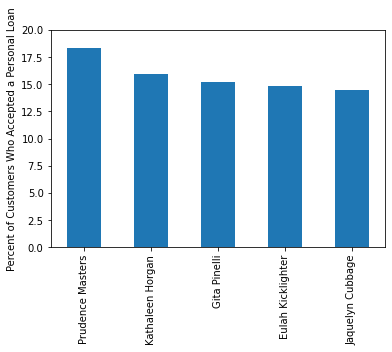

In [67]:
print(mostSuccessfulTotal.head(5))
print(mostSuccessfulTotal.describe())
top5Total = mostSuccessfulTotal.head()
top5Total.plot(kind = 'bar', stacked = True)
plt.ylabel("Percent of Customers Who Accepted a Personal Loan")
plt.ylim((0,20))

# Part D: Machine Learning

In [68]:
from sklearn.model_selection import train_test_split # to split the data so we can train on a subset
from sklearn.model_selection import KFold # cut the training data into k subpieces (folds), the model will get part and keep the other part aside
from sklearn.model_selection import cross_val_score # for training
from sklearn.metrics import classification_report # evaluate algorithm
from sklearn.metrics import confusion_matrix # evaluate algorithm
from sklearn.metrics import accuracy_score # evaluate algorithm
from sklearn.linear_model import LogisticRegression # algorithm for categorical target
from sklearn.tree import DecisionTreeClassifier # algorithm
from sklearn.neighbors import KNeighborsClassifier # algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # algorithm
from sklearn.naive_bayes import GaussianNB # algorithm
from sklearn.svm import SVC # algorithm support vector machines

In [69]:
# class distribution
print(bank.groupby('Personal Loan').size())

Personal Loan
0    4019
1     480
dtype: int64


In [70]:
MLdata = bank[["Personal Loan", "Age", "Experience", "income_sqrt", "Family", "CCAvg_log","Brokerage Account", "GIC Account", "CreditCard", "MortgagePresent", "mortgage_log"]]

In [71]:
MLdata.head()

,Personal Loan,Age,Experience,income_sqrt,Family,CCAvg_log,Brokerage Account,GIC Account,CreditCard,MortgagePresent,mortgage_log
0,0,50,24,3.316625,4,0.470004,0,0,1,0,NaN
1,0,31,7,13.152946,1,1.945910,0,0,0,0,NaN
2,0,41,16,3.162278,2,0.262364,0,0,0,0,NaN
3,0,53,27,6.633250,4,0.916291,0,0,0,0,NaN
4,0,29,5,5.744563,1,1.029619,0,0,0,1,4.369448


In [72]:
# separate features from target
# get values of dataframe
array = MLdata.values # just the data inside the data frame - get rid of row indices and col names
print(array)

[[ 0.         50.         24.         ...  1.          0.
          nan]
 [ 0.         31.          7.         ...  0.          0.
          nan]
 [ 0.         41.         16.         ...  0.          0.
          nan]
 ...
 [ 0.         29.          3.         ...  0.          0.
          nan]
 [ 0.         42.         18.         ...  0.          1.
   4.91998093]
 [ 0.         60.         34.         ...  0.          0.
          nan]]


In [73]:
# features = predictor/independent/explanatory variables
X = array[:,1:10] #all predictors are in the last nine columns
print(X)

[[50.         24.          3.31662479 ...  0.          1.
   0.        ]
 [31.          7.         13.15294644 ...  0.          0.
   0.        ]
 [41.         16.          3.16227766 ...  0.          0.
   0.        ]
 ...
 [29.          3.          7.28010989 ...  0.          0.
   0.        ]
 [42.         18.          6.55743852 ...  0.          0.
   1.        ]
 [60.         34.          6.164414   ...  0.          0.
   0.        ]]


In [74]:
# target variable = dependent/response variable
Y = array[:,0] # vertical split to separate x (explanatory) from y (target)
print(Y)

[0. 0. 0. ... 0. 0. 0.]


In [75]:
# Split off test dataset
# 25% of the data will be used for testing
test_size = 0.25
seed = 12

In [76]:
# select 25% randomly and split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # generate four subsets
print(X_train) # this is a horizontal split, but randomly drawing out data
print(Y_train)
print(X_test)
print(Y_test)

[[45.         19.          9.53939201 ...  0.          0.
   0.        ]
 [54.         28.          7.28010989 ...  0.          1.
   0.        ]
 [50.         25.          3.87298335 ...  0.          0.
   0.        ]
 ...
 [43.         19.         12.36931688 ...  0.          0.
   0.        ]
 [57.         31.          7.61577311 ...  0.          0.
   1.        ]
 [58.         33.          9.74679434 ...  0.          0.
   0.        ]]
[0. 0. 0. ... 0. 0. 0.]
[[24.          0.          6.63324958 ...  0.          0.
   0.        ]
 [45.         21.          8.54400375 ...  0.          0.
   0.        ]
 [56.         32.          9.89949494 ...  0.          0.
   0.        ]
 ...
 [28.          4.         10.67707825 ...  0.          0.
   0.        ]
 [38.         14.         11.40175425 ...  0.          0.
   1.        ]
 [57.         32.          4.89897949 ...  0.          1.
   0.        ]]
[0. 0. 1. ... 0. 1. 0.]


In [94]:
# Algorithms
models = []
#models.append(('LR', LogisticRegression(max_iter = 300))) commented out because max_iter reached despite increasing
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [95]:
# evaluate each model in turn
results = []
names = []

In [96]:
 for name, model in models:
    # define how to split off validation data (the split in the test)
    kfold= KFold(n_splits = 10, random_state = seed) # folding data into 10 peices
    # train the model
    cv_results= cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') # score model with kfold
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # output mean and std bc we run each algorithm 10 times (n_splits=10)- gives each algorithm 10 chances to see how it performs
    print(msg)
    
    # CART is best with ~94% accuracy

/usr/local/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.929459 (0.012840)
KNN: 0.932134 (0.014822)
CART: 0.939251 (0.015437)
NB: 0.894484 (0.019982)


/usr/local/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.897455 (0.014386)


[array([0.95266272, 0.91420118, 0.93195266, 0.92307692, 0.91988131,
       0.92878338, 0.9347181 , 0.90801187, 0.94065282, 0.94065282]), array([0.94378698, 0.91420118, 0.9260355 , 0.92307692, 0.91988131,
       0.93175074, 0.93175074, 0.91691395, 0.95548961, 0.95845697]), array([0.95266272, 0.9260355 , 0.92307692, 0.91420118, 0.92878338,
       0.94658754, 0.96142433, 0.92284866, 0.95548961, 0.95845697]), array([0.92899408, 0.90828402, 0.89053254, 0.86094675, 0.87537092,
       0.89317507, 0.90504451, 0.87240356, 0.91691395, 0.89317507]), array([0.9112426 , 0.88757396, 0.87869822, 0.89940828, 0.8694362 ,
       0.90801187, 0.90207715, 0.89317507, 0.90801187, 0.91691395])]


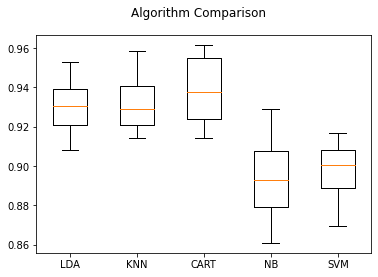

In [80]:
# Compare Algorithms
print(results)# results for all algorithms, 10 each
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [81]:
# Make predictions on test dataset
# instantiate learning model
cart = DecisionTreeClassifier()

In [82]:
# fitting the model
cart.fit(X_train, Y_train) # Learn on all of the training data

DecisionTreeClassifier()

In [83]:
# predict the response
predictions = cart.predict(X_test) # "final exam"- how does it perform on data it has never seen before
print(predictions)
print(Y_test)

[0. 0. 0. ... 0. 1. 0.]
[0. 0. 1. ... 0. 1. 0.]


In [84]:
# evaluate accuracy
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.944
[[966  25]
 [ 38  96]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       991
         1.0       0.79      0.72      0.75       134

    accuracy                           0.94      1125
   macro avg       0.88      0.85      0.86      1125
weighted avg       0.94      0.94      0.94      1125

